In [1]:
import numpy as np
import pickle
import h5py
from scipy.sparse import csr_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [2]:
def topk_values(array, topk):
    temp_mat = np.zeros(len(array))
    topk = min(topk, np.count_nonzero(array > 0))
    temp_mat[np.argpartition(array, -topk)[-topk:]] = 1
    return temp_mat

def topk_per_row(matrix, topk):
    temp_mat = np.apply_along_axis(topk_values, 1, matrix, topk)
    return temp_mat

In [3]:
depth = 20
recipe_threshold = 2000
ingred_threshold = 700
label_threshold = 10
ingred_topk = 10

In [4]:
h5f_train = h5py.File('./Container/train', 'r')
train_features = h5f_train['features_boolean'][:]
train_labels = h5f_train['labels_one_hot'][:]
h5f_train.close()

In [5]:
h5f_valid = h5py.File('./Container/valid_cpl', 'r')
valid_features = h5f_valid['features_cpl'][:]
valid_answer = h5f_valid['features_answer'][:]
answer = np.where(valid_answer - valid_features == 1)[1]
h5f_valid.close()

In [6]:
recipe_num, ingred_num = train_features.shape
_, label_num = train_labels.shape

1 1
depth:0	macro_f1: 0.0	micro_f1: 0.0	acc: 0.0	MAP: 4.247366632687733e-05	recall: 0.00012742099898063202	recall_rank: 3.0
depth:1	macro_f1: 0.0020125613163631643	micro_f1: 0.015927624872579	acc: 0.015927624872579	MAP: 0.1298667742666217	recall: 0.2930682976554536	recall_rank: 4.114347826086957
depth:2	macro_f1: 0.001856988215071002	micro_f1: 0.015163098878695208	acc: 0.015163098878695208	MAP: 0.1298547400611624	recall: 0.29243119266055045	recall_rank: 4.101089324618736
depth:3	macro_f1: 0.0008335630653289261	micro_f1: 0.011467889908256881	acc: 0.011467889908256881	MAP: 0.11517230150639957	recall: 0.2545871559633027	recall_rank: 3.973973973973974
depth:4	macro_f1: 0.0008301164625918167	micro_f1: 0.011213047910295617	acc: 0.011213047910295617	MAP: 0.11515035677879733	recall: 0.2544597349643221	recall_rank: 3.970956434651978
depth:5	macro_f1: 0.0005608945119767676	micro_f1: 0.009811416921508664	acc: 0.009811416921508664	MAP: 0.10866300988625176	recall: 0.23649337410805302	recall_rank: 3

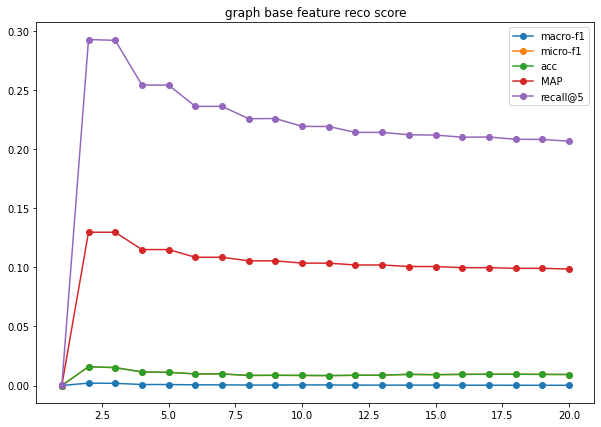

1 2
depth:0	macro_f1: 0.0	micro_f1: 0.0	acc: 0.0	MAP: 4.247366632687733e-05	recall: 0.00012742099898063202	recall_rank: 3.0
depth:1	macro_f1: 0.002012724066097932	micro_f1: 0.015927624872579	acc: 0.015927624872579	MAP: 0.1298667742666217	recall: 0.2930682976554536	recall_rank: 4.114347826086957
depth:2	macro_f1: 0.0019392066201917204	micro_f1: 0.015545361875637105	acc: 0.015545361875637105	MAP: 0.12988689869423847	recall: 0.29281345565749234	recall_rank: 4.108790252393385
depth:3	macro_f1: 0.0009115123801249936	micro_f1: 0.01261467889908257	acc: 0.01261467889908257	MAP: 0.11852064220183521	recall: 0.2619775739041794	recall_rank: 4.005836575875486
depth:4	macro_f1: 0.000905159577331481	micro_f1: 0.01261467889908257	acc: 0.01261467889908257	MAP: 0.11848752285487794	recall: 0.2619775739041794	recall_rank: 4.007295719844358
depth:5	macro_f1: 0.0007188242013051269	micro_f1: 0.011977573904179408	acc: 0.011977573904179408	MAP: 0.11401261872401049	recall: 0.24617737003058104	recall_rank: 3.951

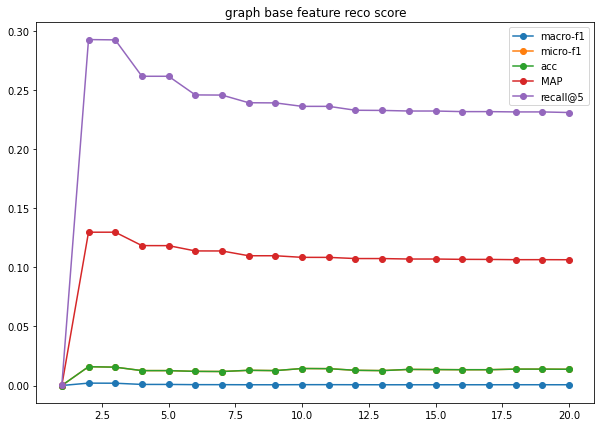

1 4
depth:0	macro_f1: 0.0	micro_f1: 0.0	acc: 0.0	MAP: 4.247366632687733e-05	recall: 0.00012742099898063202	recall_rank: 3.0
depth:1	macro_f1: 0.002011895775631192	micro_f1: 0.015927624872579	acc: 0.015927624872579	MAP: 0.1298667742666217	recall: 0.2930682976554536	recall_rank: 4.114347826086957
depth:2	macro_f1: 0.0018755317944318776	micro_f1: 0.015672782874617736	acc: 0.015672782874617736	MAP: 0.12982516018639906	recall: 0.29281345565749234	recall_rank: 4.109225413402959
depth:3	macro_f1: 0.0007318547516334592	micro_f1: 0.010703363914373088	acc: 0.010703363914373088	MAP: 0.11732470511140265	recall: 0.2528032619775739	recall_rank: 3.9163306451612905
depth:4	macro_f1: 0.000728744827995878	micro_f1: 0.010703363914373088	acc: 0.010703363914373088	MAP: 0.11730877748653007	recall: 0.25267584097859325	recall_rank: 3.914775592536561
depth:5	macro_f1: 0.00047902176204747834	micro_f1: 0.011467889908256881	acc: 0.011467889908256881	MAP: 0.1111067626167015	recall: 0.23942405708460754	recall_rank:

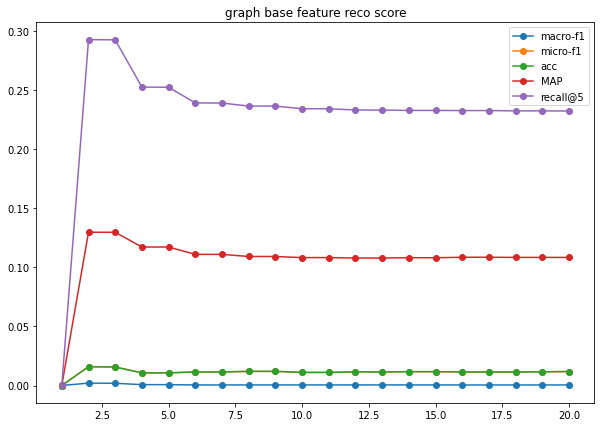

1 8
depth:0	macro_f1: 0.0	micro_f1: 0.0	acc: 0.0	MAP: 4.247366632687733e-05	recall: 0.00012742099898063202	recall_rank: 3.0
depth:1	macro_f1: 0.002011839943926545	micro_f1: 0.015927624872579	acc: 0.015927624872579	MAP: 0.1298667742666217	recall: 0.2930682976554536	recall_rank: 4.114347826086957
depth:2	macro_f1: 0.00204277128184369	micro_f1: 0.016055045871559634	acc: 0.016055045871559634	MAP: 0.12980549083377863	recall: 0.2930682976554536	recall_rank: 4.114782608695652
depth:3	macro_f1: 0.0006564531025925228	micro_f1: 0.01083078491335372	acc: 0.01083078491335372	MAP: 0.1150997423264243	recall: 0.24885321100917432	recall_rank: 3.996927803379416
depth:4	macro_f1: 0.0006542556771046227	micro_f1: 0.01083078491335372	acc: 0.01083078491335372	MAP: 0.11506434760448526	recall: 0.24872579001019368	recall_rank: 3.994877049180328
depth:5	macro_f1: 0.00047445942810176253	micro_f1: 0.011850152905198776	acc: 0.011850152905198776	MAP: 0.11014797016326078	recall: 0.2384046890927625	recall_rank: 4.0491

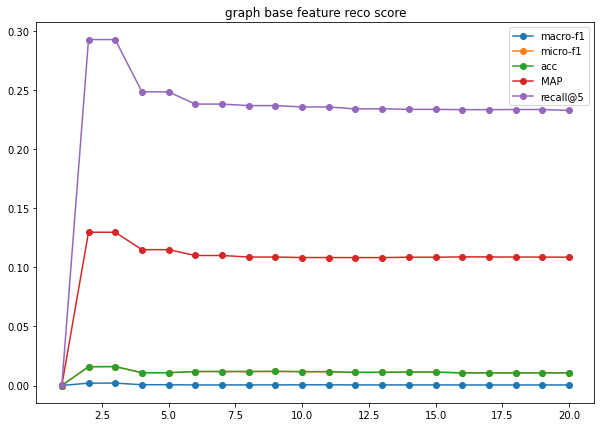

2 1
depth:0	macro_f1: 0.0	micro_f1: 0.0	acc: 0.0	MAP: 4.247366632687733e-05	recall: 0.00012742099898063202	recall_rank: 3.0
depth:1	macro_f1: 0.0019906614500981375	micro_f1: 0.01580020387359837	acc: 0.01580020387359837	MAP: 0.12985342540006184	recall: 0.29281345565749234	recall_rank: 4.1096605744125325
depth:2	macro_f1: 0.0019004049439673852	micro_f1: 0.015672782874617736	acc: 0.015672782874617736	MAP: 0.12976691058686507	recall: 0.29268603465851173	recall_rank: 4.108837614279495
depth:3	macro_f1: 0.0006621280518616591	micro_f1: 0.009301732925586137	acc: 0.009301732925586137	MAP: 0.1139303512774462	recall: 0.2492354740061162	recall_rank: 3.9335378323108383
depth:4	macro_f1: 0.0006590983623453742	micro_f1: 0.009174311926605505	acc: 0.009174311926605505	MAP: 0.11390097365823677	recall: 0.24910805300713557	recall_rank: 3.931969309462916
depth:5	macro_f1: 0.000607118766021899	micro_f1: 0.010321100917431193	acc: 0.010321100917431193	MAP: 0.10707869156837084	recall: 0.23152395514780835	recal

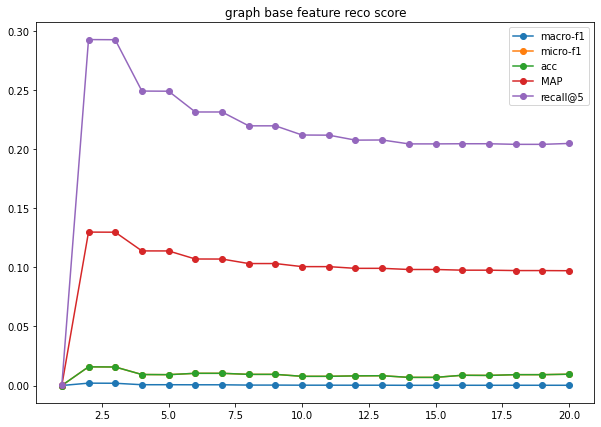

4 1
depth:0	macro_f1: 0.0	micro_f1: 0.0	acc: 0.0	MAP: 4.247366632687733e-05	recall: 0.00012742099898063202	recall_rank: 3.0
depth:1	macro_f1: 0.002005146953800378	micro_f1: 0.016055045871559634	acc: 0.016055045871559634	MAP: 0.1298256658252839	recall: 0.2930682976554536	recall_rank: 4.116086956521739
depth:2	macro_f1: 0.0019456832591354118	micro_f1: 0.015672782874617736	acc: 0.015672782874617736	MAP: 0.12981863744478456	recall: 0.29281345565749234	recall_rank: 4.110095735422107
depth:3	macro_f1: 0.0005218227536438913	micro_f1: 0.009429153924566768	acc: 0.009429153924566768	MAP: 0.11366251436014445	recall: 0.24872579001019368	recall_rank: 3.9410860655737703
depth:4	macro_f1: 0.0005214636428814468	micro_f1: 0.009429153924566768	acc: 0.009429153924566768	MAP: 0.11368375119330788	recall: 0.24872579001019368	recall_rank: 3.9405737704918034
depth:5	macro_f1: 0.0005147616688763361	micro_f1: 0.010066258919469929	acc: 0.010066258919469929	MAP: 0.10683497362587616	recall: 0.23063200815494395	rec

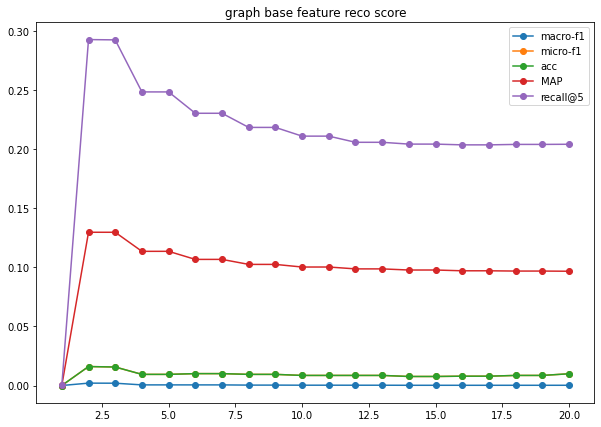

8 1
depth:0	macro_f1: 0.0	micro_f1: 0.0	acc: 0.0	MAP: 4.247366632687733e-05	recall: 0.00012742099898063202	recall_rank: 3.0
depth:1	macro_f1: 0.001930022848500776	micro_f1: 0.015672782874617736	acc: 0.015672782874617736	MAP: 0.12979982767826836	recall: 0.29281345565749234	recall_rank: 4.1096605744125325
depth:2	macro_f1: 0.002024303109614945	micro_f1: 0.015927624872579	acc: 0.015927624872579	MAP: 0.12984831844732492	recall: 0.292940876656473	recall_rank: 4.113527620704654
depth:3	macro_f1: 0.0005112732252041096	micro_f1: 0.009046890927624873	acc: 0.009046890927624873	MAP: 0.11363010290762594	recall: 0.24808868501529052	recall_rank: 3.9275808936825887
depth:4	macro_f1: 0.0005251310579820465	micro_f1: 0.009301732925586137	acc: 0.009301732925586137	MAP: 0.11364142921864644	recall: 0.24821610601427116	recall_rank: 3.931211498973306
depth:5	macro_f1: 0.0004921742956732062	micro_f1: 0.010066258919469929	acc: 0.010066258919469929	MAP: 0.10683128246201677	recall: 0.23037716615698267	recall_ran

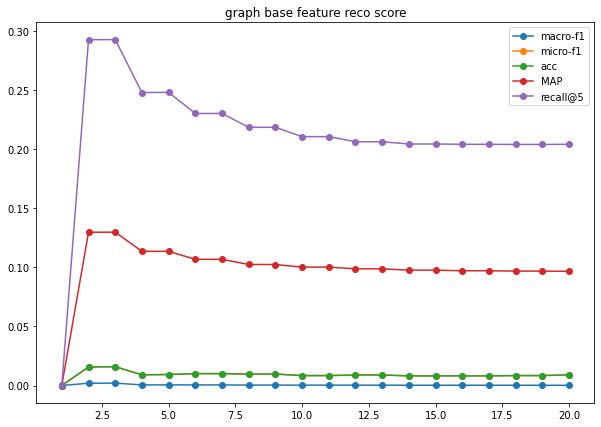

In [7]:
macro_f1_dict = {}
micro_f1_dict = {}
acc_dict = {}
MAP_dict = {}
recall10_dict = {}
recall_rank_dict = {}

for w1, w2 in [(1,1), (1,2), (1,4), (1,8), (2,1), (4,1), (8,1)]:
    print(w1, w2)
    adj_matrix = np.hstack([np.zeros((recipe_num, recipe_num)), w1*train_features, w2*train_labels])
    temp_matrix = np.hstack([w1*train_features.T, np.zeros((ingred_num, ingred_num)), np.zeros((ingred_num, label_num))])
    adj_matrix = np.vstack([adj_matrix, temp_matrix])
    temp_matrix = np.hstack([w2*train_labels.T, np.zeros((label_num, ingred_num)), np.zeros((label_num, label_num))])
    adj_matrix = np.vstack([adj_matrix, temp_matrix])
    adj_matrix = csr_matrix(adj_matrix)
    
    query_num, _ = valid_features.shape
    score_matrix = csr_matrix(np.hstack([np.zeros((query_num, recipe_num)), valid_features, np.zeros((query_num, label_num))]))
    src_matrix = score_matrix.copy()
    
    score_matrix = normalize(score_matrix, axis=1, norm='l1')
    exist_idx = score_matrix > 0
    
    macro_f1_lst = []
    micro_f1_lst = []
    acc_lst = []
    MAP_lst = []
    recall10_lst = []
    recall_rank_lst = []
    
    for k in range(depth):
        # start node의 누적 점수 * 인접행렬 -> next node에 더해질 값
        src_matrix = np.multiply(score_matrix.toarray(), src_matrix.toarray()) @ adj_matrix
        score_matrix = csr_matrix(score_matrix + src_matrix)
        score_matrix = normalize(score_matrix, axis=1, norm='l1')
        # next_node의 score matrix
        src_matrix = score_matrix.toarray() * (src_matrix>0)
        src_recipe_matrix = topk_per_row(src_matrix[:, :recipe_num], recipe_threshold)
        src_ingred_matrix = topk_per_row(src_matrix[:, recipe_num:recipe_num+ingred_num], ingred_threshold)
        src_label_matrix = topk_per_row(src_matrix[:, recipe_num+ingred_num:], label_threshold)
        src_matrix = csr_matrix(np.hstack([src_recipe_matrix, src_ingred_matrix, src_label_matrix]))

        score_matrix_ = score_matrix.copy()
        score_matrix_[exist_idx] = 0

        ingred_recs = {}
        ingred_rec_idx_lst = np.argpartition(score_matrix_[:, recipe_num:recipe_num+ingred_num].toarray(), -ingred_topk)[:,-ingred_topk:]
        top_recommends = ingred_rec_idx_lst[:,0].flatten()

        MAP = 0
        recall10 = 0
        recall_rank = 0

        for query, ingred_rec_idx in enumerate(ingred_rec_idx_lst):
            ingred_recs[query] = []

            for idx in ingred_rec_idx:
                ingred_recs[query].append((idx, score_matrix_[query, recipe_num + idx]))

            ingred_recs[query].sort(key=lambda x : x[1], reverse=True)

            for j, rec in enumerate(ingred_recs[query]):
                idx, _ = rec
                if answer[query] == idx:
                    MAP += 1/(j+1)
                    recall10 += 1
                    recall_rank += j+1

        MAP = MAP / len(ingred_rec_idx_lst)
        if recall10 != 0:
            recall_rank_avg = recall_rank / recall10
        else:
            recall_rank_avg = 0
        recall10 = recall10/len(ingred_rec_idx_lst)

        MAP_lst.append(MAP)
        recall10_lst.append(recall10)
        recall_rank_lst.append(recall_rank_avg)

        macro_f1 = f1_score(answer, top_recommends, average='macro')
        micro_f1 = f1_score(answer, top_recommends, average='micro')
        accuracy = accuracy_score(answer, top_recommends)
        macro_f1_lst.append(macro_f1)
        micro_f1_lst.append(micro_f1)
        acc_lst.append(accuracy)
        if k % 1 == 0:
            print("depth:{}\tmacro_f1: {}\tmicro_f1: {}\tacc: {}\tMAP: {}\trecall: {}\trecall_rank: {}".format(k, macro_f1, micro_f1, accuracy, MAP, recall10, recall_rank_avg))
            with open("./recs/Graph_rec_cpl_{}_{}_depth_{}.pickle".format(w1,w2,k), 'wb') as f:
                pickle.dump(ingred_recs, f)
                
    macro_f1_dict[w1/w2] = macro_f1_lst
    micro_f1_dict[w1/w2] = micro_f1_lst
    acc_dict[w1/w2] = acc_lst
    MAP_dict[w1/w2] = MAP_lst
    recall10_dict[w1/w2] = recall10_lst
    recall_rank_dict[w1/w2] = recall_rank_lst
    
    depth_lst = [i for i in range(1, depth+1)]

    plt.figure(figsize=(10,7))
    plt.plot(depth_lst, macro_f1_lst, 'o-', label='macro-f1')
    plt.plot(depth_lst, micro_f1_lst, 'o-', label='micro-f1')
    plt.plot(depth_lst, acc_lst, 'o-', label='acc')
    plt.plot(depth_lst, MAP_lst, 'o-', label='MAP')
    plt.plot(depth_lst, recall10_lst, 'o-', label='recall@10')
    plt.title("graph base feature reco score")
    plt.legend()
    plt.savefig('./data_analysis/graph_cpl_scores_{}_{}.png'.format(w1,w2), dpi=100)
    plt.show()

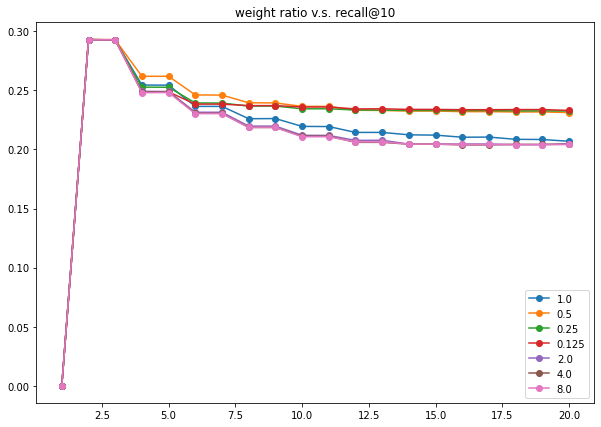

In [8]:
ratio_lst = [w1/w2 for w1, w2 in [(1,1), (1,2), (1,4), (1,8), (2,1), (4,1), (8,1)]]

plt.figure(figsize=(10,7))
for ratio in ratio_lst:
    plt.plot(depth_lst, recall10_dict[ratio], 'o-', label=str(ratio))
plt.title("weight ratio v.s. recall@10")
plt.legend()
plt.savefig('./data_analysis/graph_cpl_recall10_{}.png'.format(ratio), dpi=100)
plt.show()

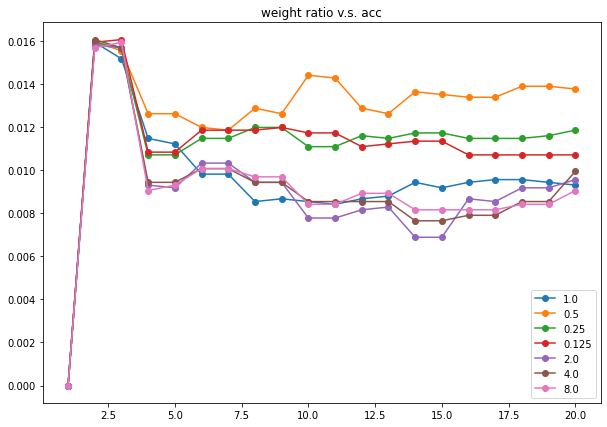

In [9]:
plt.figure(figsize=(10,7))
for ratio in ratio_lst:
    plt.plot(depth_lst, acc_dict[ratio], 'o-', label=str(ratio))
plt.title("weight ratio v.s. acc")
plt.legend()
plt.savefig('./data_analysis/graph_cpl_acc_{}.png'.format(ratio), dpi=100)
plt.show()

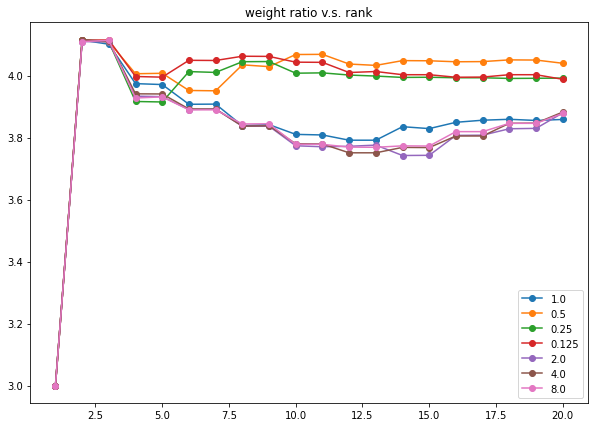

In [10]:
plt.figure(figsize=(10,7))
for ratio in ratio_lst:
    plt.plot(depth_lst, recall_rank_dict[ratio], 'o-', label=str(ratio))
plt.title("weight ratio v.s. rank")
plt.legend()
plt.savefig('./data_analysis/graph_cpl_recall_rank_{}.png'.format(ratio), dpi=100)
plt.show()

Text(0.5, 1.0, 'graph base reco score')

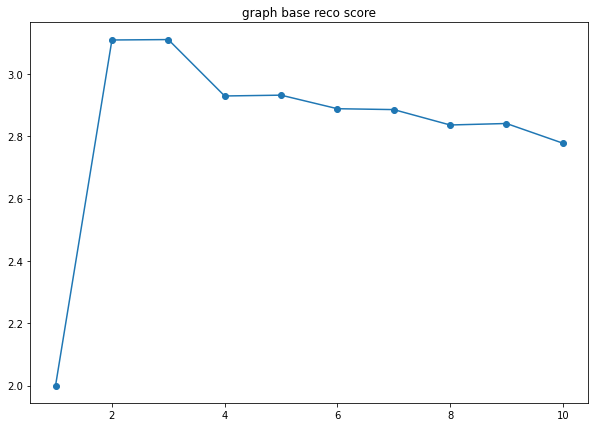

[0.0,
 0.015672782874617736,
 0.01580020387359837,
 0.008792048929663608,
 0.009174311926605505,
 0.010066258919469929,
 0.009811416921508664,
 0.009301732925586137,
 0.0095565749235474,
 0.008537206931702344]